In [7]:
#Pivot Tables in pandas
#Exploring the Titanic Dataset(very famous) with Pandas in Python
import pandas as pd
import numpy as np
df = pd.read_csv('E:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\titanic\\train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [8]:
#single index
table = pd.pivot_table(data=df,index=['Sex'])  #Table Object
print(table)
print(type(table))

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
#Pivot with a multi-index

table = pd.pivot_table(data=df,index=['Sex','Pclass'])  #Table Object
print(table)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1940\4103394054.py:2: FutureWarning: The provided callable <function mean at 0x000002101C1D2160> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df,index=['Sex'],aggfunc={'Age':np.mean,'Survived':np.sum})
C:\Users\Dell\AppData\Local\Temp\ipykernel_1940\4103394054.py:2: FutureWarning: The provided callable <function sum at 0x000002101C1D1080> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df,index=['Sex'],aggfunc={'Age':np.mean,'Survived':np.sum})


              Age  Survived
Sex                        
female  27.915709       233
male    30.726645       109


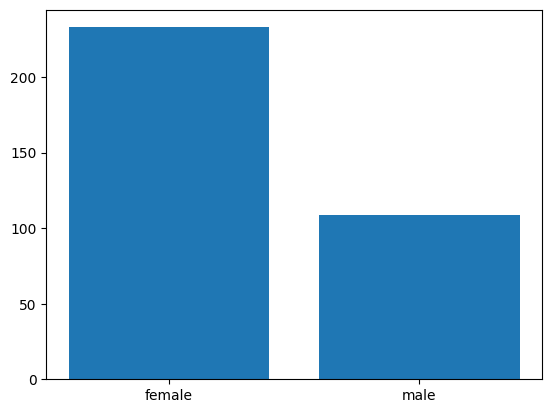

In [9]:
#different aggregate functions
table = pd.pivot_table(df,index=['Sex'],aggfunc={'Age':np.mean,'Survived':np.sum})
print(table)
#print(type(table))

import matplotlib.pyplot as plt
plt.bar(table.index,table["Survived"])
plt.show()

In [ ]:
#columns parameters
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
print(table)


In [10]:
#Handling Null values using Pivot_Table
#display null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
print(table)

                              Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333


C:\Users\Dell\AppData\Local\Temp\ipykernel_1940\338861180.py:3: FutureWarning: The provided callable <function mean at 0x000002101C1D2160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)


In [11]:
# replacing the NaN values with the mean value from the ‘Age’ column
#handling null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
print(table)

                              Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333


C:\Users\Dell\AppData\Local\Temp\ipykernel_1940\3129317565.py:3: FutureWarning: The provided callable <function mean at 0x000002101C1D2160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))


In [1]:
#Pandas GroupBy
import pandas as pd

df = pd.read_csv(
    "legislators-historical.csv",
    parse_dates=["birthday"]
)

In [4]:
print(df.head())

  last_name  first_name middle_name suffix nickname full_name   birthday  \
0   Bassett     Richard         NaN    NaN      NaN       NaN 1745-04-02   
1     Bland  Theodorick         NaN    NaN      NaN       NaN 1742-03-21   
2     Burke     Aedanus         NaN    NaN      NaN       NaN 1743-06-16   
3   Carroll      Daniel         NaN    NaN      NaN       NaN 1730-07-22   
4    Clymer      George         NaN    NaN      NaN       NaN 1739-03-16   

  gender type state  ...  opensecrets_id  lis_id fec_ids cspan_id govtrack_id  \
0      M  sen    DE  ...             NaN     NaN     NaN      NaN      401222   
1      M  rep    VA  ...             NaN     NaN     NaN      NaN      401521   
2      M  rep    SC  ...             NaN     NaN     NaN      NaN      402032   
3      M  rep    MD  ...             NaN     NaN     NaN      NaN      402334   
4      M  rep    PA  ...             NaN     NaN     NaN      NaN      402671   

  votesmart_id ballotpedia_id washington_post_id  icpsr_

In [5]:
#Single Col grpby
n_by_state = df.groupby("state")["last_name"].count()
n_by_state.head(10)

state
AK     16
AL    206
AR    117
AS      2
AZ     48
CA    361
CO     90
CT    240
DC      2
DE     97
Name: last_name, dtype: int64

In [6]:
#Muli Col grpby
df.groupby(["state", "gender"])["last_name"].count()

state  gender
AK     M          16
AL     F           3
       M         203
AR     F           5
       M         112
                ... 
WI     M         196
WV     F           1
       M         119
WY     F           2
       M          38
Name: last_name, Length: 104, dtype: int64